In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1


In [ ]:
!ls /root/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1

insurance.csv


In [ ]:
import pandas as pd

file ="/root/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1/insurance.csv"

data = pd.read_csv(file)

data.dtypes


,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data['sex'] = data['sex'].astype('string')
data['smoker'] = data['smoker'].astype('string')
data['region'] = data['region'].astype('string')

In [ ]:
data.dtypes


,0
age,int64
sex,string[python]
bmi,float64
children,int64
smoker,string[python]
region,string[python]
charges,float64


In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
null_values = data.isnull().sum()
print(null_values)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
numeric_columns = data.select_dtypes(include=['number']).columns
skewness = data[numeric_columns].skew()
print(skewness)


age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64


In [ ]:
import numpy as np

data['charges'] = np.log1p(data['charges'])  # log(x + 1) to avoid log(0)
data['children'] = np.log1p(data['children'])  # log(x + 1) to avoid log(0)


In [ ]:
numeric_columns = data.select_dtypes(include=['number']).columns
skewness = data[numeric_columns].skew()
print(skewness)


age         0.055673
bmi         0.284047
children    0.264083
charges    -0.089817
dtype: float64


In [ ]:
# To get unique values for each column
print("Unique values for 'sex':", data["sex"].unique())
print("Unique values for 'smoker':", data["smoker"].unique())
print("Unique values for 'region':", data["region"].unique())


Unique values for 'sex': <StringArray>
['female', 'male']
Length: 2, dtype: string
Unique values for 'smoker': <StringArray>
['yes', 'no']
Length: 2, dtype: string
Unique values for 'region': <StringArray>
['southwest', 'southeast', 'northwest', 'northeast']
Length: 4, dtype: string


In [ ]:
# data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)


In [ ]:
# data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [ ]:
# data['region'] = data['region'].apply(lambda x: 0 if x == 'southwest' else (1 if x == 'southeast' else (2 if x == 'northwest' else 3)))

In [ ]:
# # To get unique values for each column
# print("Unique values for 'sex':", data["sex"].unique())
# print("Unique values for 'smoker':", data["smoker"].unique())
# print("Unique values for 'region':", data["region"].unique())


In [ ]:
# data.skew()

In [ ]:
data = pd.get_dummies(data, columns=["sex", "smoker", "region"])

# Convert boolean columns (True/False) to 1/0
data = data.astype(int)

# Check the updated data
print(data.head())
data.columns

   age  bmi  children  charges  sex_female  sex_male  smoker_no  smoker_yes  \
0   19   27         0        9           1         0          0           1   
1   18   33         0        7           0         1          1           0   
2   28   33         1        8           0         1          1           0   
3   33   22         0        9           0         1          1           0   
4   32   28         0        8           0         1          1           0   

   region_northeast  region_northwest  region_southeast  region_southwest  
0                 0                 0                 0                 1  
1                 0                 0                 1                 0  
2                 0                 0                 1                 0  
3                 0                 1                 0                 0  
4                 0                 1                 0                 0  


Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [ ]:
# Check for missing data
# print(data.isnull().sum())

data['charges']

,charges
0,9
1,7
2,8
3,9
4,8
...,...
1333,9
1334,7
1335,7
1336,7


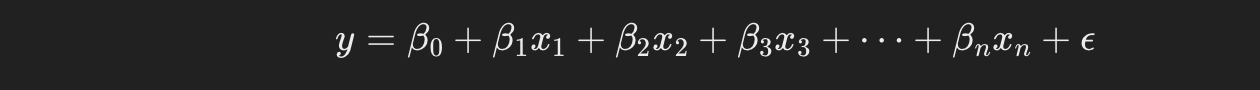

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split data into features (X) and target (y)
X = data.drop('charges', axis=1)  # All columns except the target
y = data['charges']  # The target column

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)


# Make predictions on the test data
y_pred = model.predict(X_test)
print(y_pred)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")


[ 8.72581319  8.14244116 10.53316929  8.61872439  8.88220084  8.1487993
  7.40984287  9.22658884  7.78057824  8.76817039  9.38659815  8.49660593
  7.85957027 10.2263799  10.50802481 10.21271613  8.97964286 10.0187573
  8.47790618  9.75365951  7.78613973  8.56855336  7.43965675  7.83716922
  8.84935936  8.93612291  9.06910536  8.02100219  8.81274804  7.41988199
  8.46317681  8.93464677  7.62609327  7.9927067   7.69949334  8.64684859
  7.50718194  8.3618987  10.06234349  9.55367738  7.6709712   7.59139434
  8.92062731  8.88864142  8.25279045  8.88634983  7.83637257  7.842905
 10.02615062  8.21663888  9.21050448  7.40718617  8.43057325  7.47957605
  8.88120679  8.95621205  7.91231439  9.57835911  8.96947469  8.91169922
  9.12968062  8.28706792  9.28748789  8.50161997  8.83649224  7.78200595
  9.06521835  8.84379882  7.63255995  7.66527768  8.36162035  8.85180345
  8.61562432  8.43742007  8.48655592  8.11940687  8.10246324  8.82135233
  8.08587069  8.59799109  7.53220848 10.51499968  8.166

In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'trained_model.pkl')


['trained_model.pkl']

19	27	0	9	0	1	0	0	1

'age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'

In [ ]:
import joblib

# Step 1: Load the model
model = joblib.load('trained_model.pkl')


test_data = [[19,27,0,0,1,0,1,1,0,0,0]]

# Step 2: Make predictions
predictions = model.predict(test_data)
print(predictions)

[8.93155641]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt

train_sizes = [50, 100, 200, 300, len(X_train)]
train_scores = []
val_scores = []

for size in train_sizes:
    model.fit(X_train[:size], y_train[:size])
    train_scores.append(model.score(X_train[:size], y_train[:size]))
    val_scores.append(model.score(X_test, y_test))

plt.plot(train_sizes, train_scores, label='Training Score')
plt.plot(train_sizes, val_scores, label='Validation Score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.title('Learning Curve')
plt.show()


In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.legend()
plt.title('Learning Curve')
plt.show()


"""Based on the two learning curve images provided, let me explain them:

---

### **First Learning Curve**:
- **Observation**:
  - The training score starts high (~0.78) and gradually decreases as the training set size increases.
  - The validation score starts low (~0.66) but increases and stabilizes as the training size grows.
- **Interpretation**:
  - Initially, the model performs well on the training data but poorly on the validation data, indicating overfitting at the start.
  - As more data is added, the training score reduces while the validation score improves and converges, suggesting the model generalizes better with sufficient data.
  - This pattern indicates that the model transitions from overfitting to a good fit as training size increases.

---

### **Second Learning Curve**:
- **Observation**:
  - The validation score starts high (~0.74) and remains stable as training size increases.
  - The training score starts very low (~0.62) and steadily increases with more training data.
- **Interpretation**:
  - The model struggles to fit the training data initially, which is common when there's insufficient data or the model is underpowered.
  - As more data is introduced, the training score rises, and the validation score remains consistently high, indicating no overfitting.
  - This pattern suggests the model was underfitting at first but moves towards a normal fit as training size grows.

---

### **Key Differences Between the Two**:
1. **First Curve**:
   - Initially overfits but normalizes with more data.
   - Validation and training scores converge at a moderate level.
2. **Second Curve**:
   - Starts with underfitting and improves over time.
   - Validation score remains consistently higher than the training score, indicating stable generalization.

---

**Conclusion**:
- **First Curve**: Good fit with adequate training data; initially overfitting.
- **Second Curve**: Gradual improvement from underfitting to a good fit."""

Your statement describes **bias-variance tradeoff**, a key concept in machine learning that helps identify whether a model is underfitting or overfitting. Here's a detailed explanation:

---

### **Bias and Variance Definitions**:
1. **Bias**:
   - The error due to overly simplistic assumptions in the model.
   - **High bias**: The model is too simple to capture the underlying patterns, leading to underfitting.
   - **Low bias**: The model captures the patterns in the data well.

2. **Variance**:
   - The error due to model sensitivity to small fluctuations in the training data.
   - **High variance**: The model is too complex and overfits the training data.
   - **Low variance**: The model generalizes well across datasets.

---

### **Low Bias & High Variance**:
- **What it Means**:
  - The model is **very complex** and captures training data patterns well (low bias).
  - However, it fails to generalize to unseen data (high variance).
- **Outcome**:
  - Training score: **High**
  - Validation/Test score: **Low**
- **Example**: Overfitting.
  - The model memorizes the training data but performs poorly on validation data.

---

### **High Bias & Low Variance**:
- **What it Means**:
  - The model is **too simple** and cannot capture the underlying patterns of the data (high bias).
  - It is consistent but wrong for both training and test data (low variance).
- **Outcome**:
  - Training score: **Low**
  - Validation/Test score: **Low**
- **Example**: Underfitting.
  - The model doesn't capture the complexity of the data.

---

### **Key Indicators**:
1. **High Variance (Overfitting)**:
   - Large gap between training and validation performance.
   - Training score is **much higher** than the test score.
   - Example: In your first learning curve, initially, the model shows high variance because the training score is much higher than the validation score.

2. **High Bias (Underfitting)**:
   - Both training and validation scores are **low**.
   - Example: In your second learning curve, the training score starts very low and rises slowly, indicating high bias at the beginning.

---

### **What You Need**:
1. **Reduce Variance (Overfitting)**:
   - Use a simpler model (reduce complexity).
   - Add regularization (e.g., L1/L2 penalties).
   - Increase the size of the training dataset.

2. **Reduce Bias (Underfitting)**:
   - Use a more complex model.
   - Add more features or interactions.
   - Decrease regularization.

---

This tradeoff must be balanced to achieve a **good fit** where the model has low bias and low variance, leading to better performance on both training and unseen data.